# Figure 4: robustness of vibration results

In [4]:
from directory_paths import SAVE_DIR
from train.train_model_utils import *
import pandas as pd
from utils.analysis_plots_helper import *

In [17]:
# The following commands will reload all modules (except those excluded by %autoreload) automatically before executing the Python code typed.
# %load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [3]:
original_hex_biceps = "#FF3B30"
original_hex_tri = "#00C7BE"
MARKER_LIST = ["o", "X", "^", "p", "d", "*", "h", "H", "+", "x", "X", "D", "d", "|", "_"]

aff_Ia_color = "#762A83"
aff_II_color = "#DE8F05"
colors_aff_dict = {"i_a": aff_Ia_color, "ii": aff_II_color}

set_publication_style()

## Define data to use

- Use all coef seeds (5) and train seeds (4): 20 models in total
- Vibration of all triceps and biceps at different frequencies

In [6]:
### Load directly from downloaded figure data if available 
num_vib_muscles = 2
num_cols = 9
test_exp_dir = "vib_vary_multipleFs_vib_ia_only"
df_file_path = os.path.join(
    SAVE_DIR,
    "data_for_figs", 
    f"df_all_{test_exp_dir}_{num_vib_muscles}Muscles_numCols-{num_cols}.h5")

### Or load from vibration experiments directly
n_aff = 5
task = "letter_reconstruction_joints"
## For pre-trained models downloaded
coef_seeds_to_load = None # to use all available
train_seeds_to_load = ['0','1','2','9']
model_path = os.path.join(
    SAVE_DIR,
    f"trained_models/experiment_causal_flag-pcr_optimized_linear_extended_{n_aff}_{n_aff}_{task}/",
)
INPUT_DATA = "ES3D"
PATH_TO_SAVE = model_path + "/" + "test" + "/" + INPUT_DATA + "/" + test_exp_dir

vib_muscles = None # to load all available
vib_range = None

# Initialize an empty list to store DataFrames
columns_to_load = ["vib_freq", "vib_muscles", "trial", "elbow_angle", "vib_angle_diff_elbow"]
# columns_to_load = None

path_save = model_path + "/plots/" + test_exp_dir
if not os.path.exists(path_save):
    os.makedirs(path_save)
    print("created directory ", path_save)

created directory  /media/data16/adriana/ProprioPerception/0_Zenodo/trained_models/experiment_causal_flag-pcr_optimized_linear_extended_5_5_letter_reconstruction_joints//plots/vib_vary_multipleFs_vib_ia_only


## Load data

- From the dataframe if available to reproduce the paper figures or from the vibration results if new data desired. 

In [7]:
# Use dataframe to load data or from the models if df not available
loaded_from_hdf = False

# if figure data is available, load it
if os.path.exists(df_file_path):
    print("loading df_all from ", df_file_path)
    df_all = pd.read_hdf(df_file_path, key="df", mode="r")
    loaded_from_hdf = True
else:
    df_all = load_vibration_data(
        model_path=model_path,
        test_exp_dir=test_exp_dir,
        vib_muscles=vib_muscles,
        vib_range=vib_range,
        columns_to_load=columns_to_load,
        coef_seeds_to_load=coef_seeds_to_load,
        train_seeds_to_load=train_seeds_to_load,
        input_data=INPUT_DATA,
        sample_rate=SAMPLE_RATE,
        exact_vib_muscles=True
    )

loading df_all from  /media/data16/adriana/ProprioPerception/0_Zenodo/data_for_figs/df_all_vib_vary_multipleFs_vib_ia_only_2Muscles_numCols-9.h5


In [ ]:
### Check dataframe all seeds are loaded and trials are correct

# keep only rows with vib_muscles_str = TRI or BIC
# df_all_f = df_all[df_all["vib_muscles_str"].isin(["TRI", "BIC"])]
df_all_f = df_all[df_all["vib_muscles_str"].isin(["TRIlat_TRIlong_TRImed", "BIClong_BICshort"])]

# remove rows with same coef_seed, train_seed, vib_musclse_str, vib_freq and trial
# df_all_f = df_all_f.drop_duplicates(subset=["coef_seed", "train_seed", "vib_muscles_str", "vib_freq", "trial"], keep="first")

# make sure we have 5 coef seeds, 4 train_seeds per coef_seed
# 100 trials per condition 
# all the vib freqs per model [0, 10, 20, 40, 60, 80, 100, 110, 130, 150, 170, 190]
# all the vib muscles per model ['BIC', 'TRI']
# should have 9600 trials per coef seed, 2400 trials per coef seed/train seed combination

# summary = summarize_dataframe(df_all_f)
# print(summary)

df_all = df_all_f

Index(['vib_freq', 'vib_muscles', 'trial', 'elbow_angle',
       'vib_angle_diff_elbow', 'seed_path', 'coef_seed', 'train_seed',
       'vib_muscles_str'],
      dtype='object')

In [12]:
df_all.head()

,vib_freq,vib_muscles,trial,elbow_angle,vib_angle_diff_elbow,seed_path,coef_seed,train_seed,vib_muscles_str
0,0,"[TRIlat, TRIlong, TRImed]",0,59.754978,-0.000008,spatiotemporal_4_8-8-32-64_7171_0_1,0,1,TRIlat_TRIlong_TRImed
1,0,"[TRIlat, TRIlong, TRImed]",1,60.563911,0.000000,spatiotemporal_4_8-8-32-64_7171_0_1,0,1,TRIlat_TRIlong_TRImed
2,0,"[TRIlat, TRIlong, TRImed]",2,116.971245,0.000000,spatiotemporal_4_8-8-32-64_7171_0_1,0,1,TRIlat_TRIlong_TRImed
3,0,"[TRIlat, TRIlong, TRImed]",3,82.039864,0.000000,spatiotemporal_4_8-8-32-64_7171_0_1,0,1,TRIlat_TRIlong_TRImed
4,0,"[TRIlat, TRIlong, TRImed]",4,55.383911,0.000000,spatiotemporal_4_8-8-32-64_7171_0_1,0,1,TRIlat_TRIlong_TRImed


In [13]:
# save df if not loaded from hdf
if not loaded_from_hdf:
    num_cols = len(df_all.columns)
    num_vib_muscles = len(df_all["vib_muscles_str"].unique())
    df_file_path = model_path + f"/df_all_vib_vary_{test_exp_dir}_{num_vib_muscles}Muscles_numCols-{num_cols}.h5"
    # save df_all to h5 file
    df_all.to_hdf(df_file_path, key="df", mode="w")
    print("saved df_all to ", df_file_path)


In [14]:
unique_seeds = df_all["coef_seed"].unique()
unique_seeds.sort()
seed_marker_map = {seed: MARKER_LIST[i] for i, seed in enumerate(unique_seeds)}

unique_train_seeds = df_all["train_seed"].unique()
unique_train_seeds.sort()
train_seed_marker_map = {seed: MARKER_LIST[i] for i, seed in enumerate(unique_train_seeds)}

df_all["vib_muscles_str"].unique()

array(['TRIlat_TRIlong_TRImed', 'BIClong_BICshort'], dtype=object)

## Fig 4 A

saved as  mean_vib_angle_diff_vsfreq_seed-0_TRIlat_TRIlong_TRImed_per_train_seed.svg


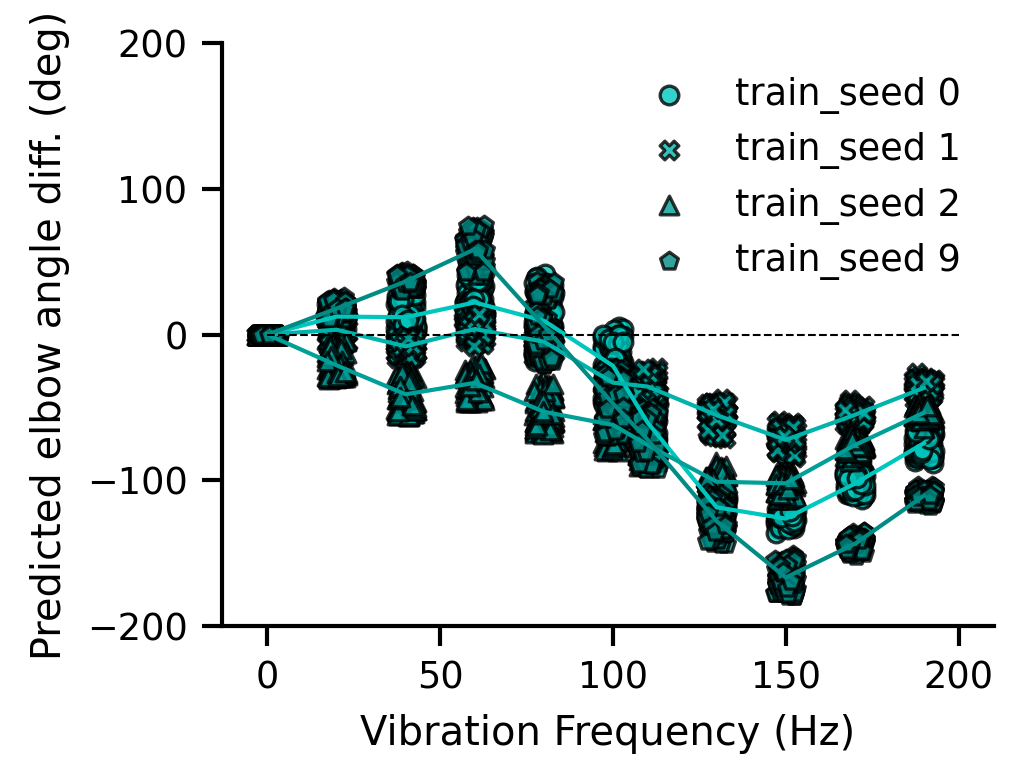

saved as  mean_vib_angle_diff_vsfreq_seed-1_TRIlat_TRIlong_TRImed_per_train_seed.svg


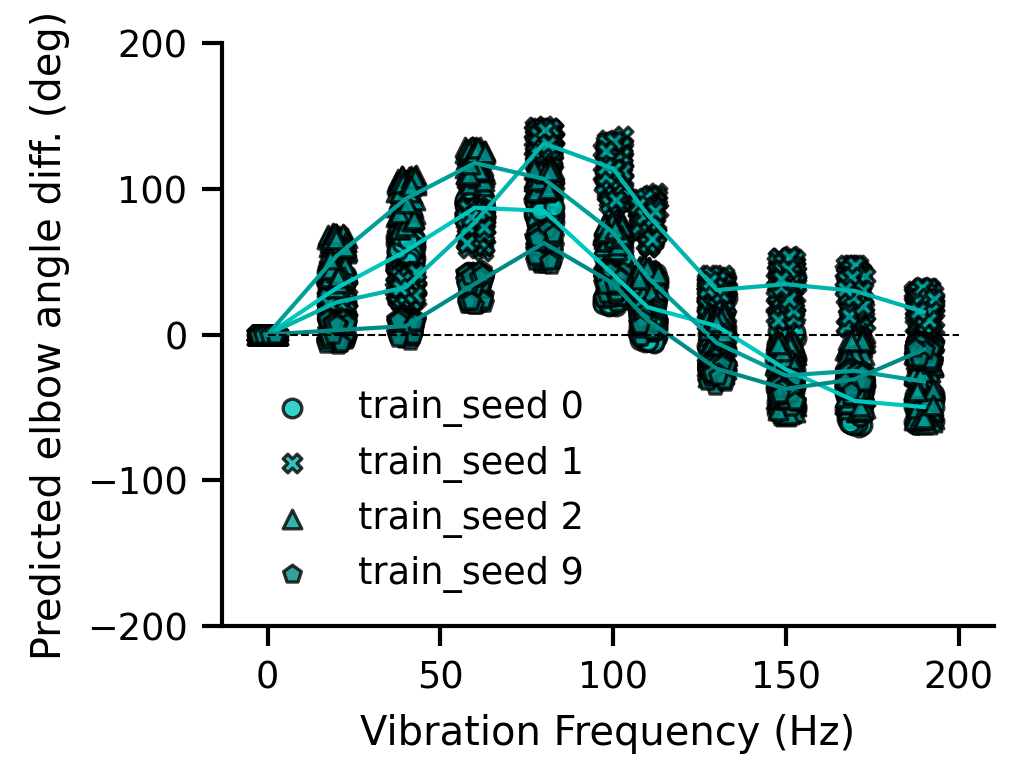

saved as  mean_vib_angle_diff_vsfreq_seed-2_TRIlat_TRIlong_TRImed_per_train_seed.svg


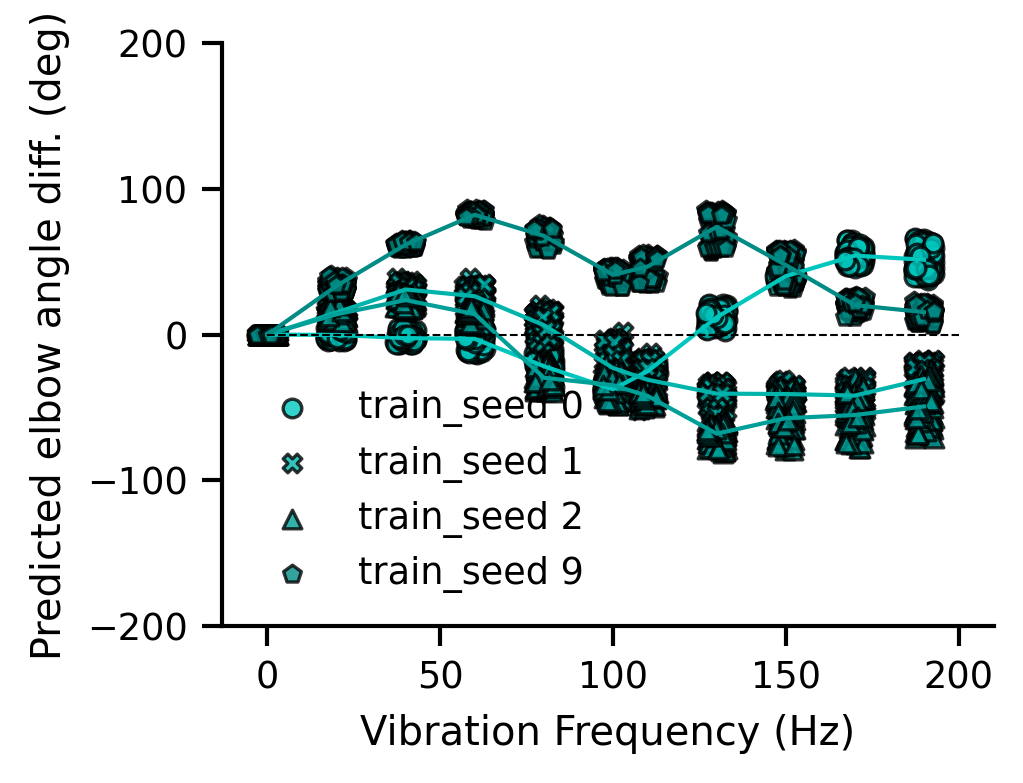

saved as  mean_vib_angle_diff_vsfreq_seed-3_TRIlat_TRIlong_TRImed_per_train_seed.svg


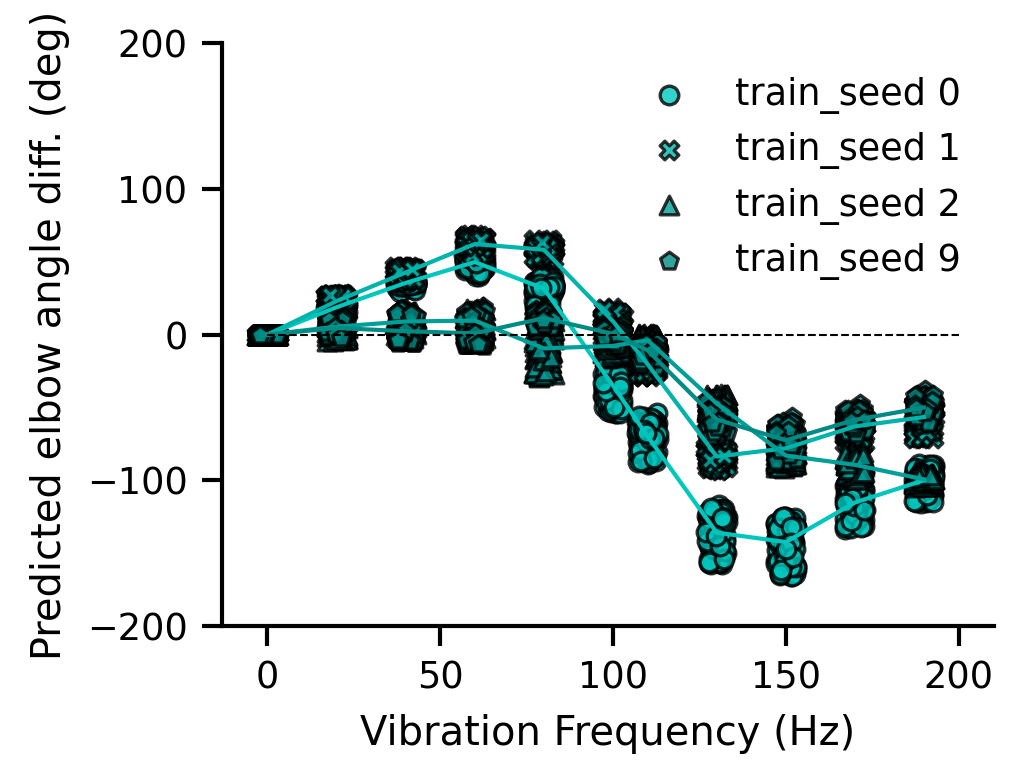

saved as  mean_vib_angle_diff_vsfreq_seed-4_TRIlat_TRIlong_TRImed_per_train_seed.svg


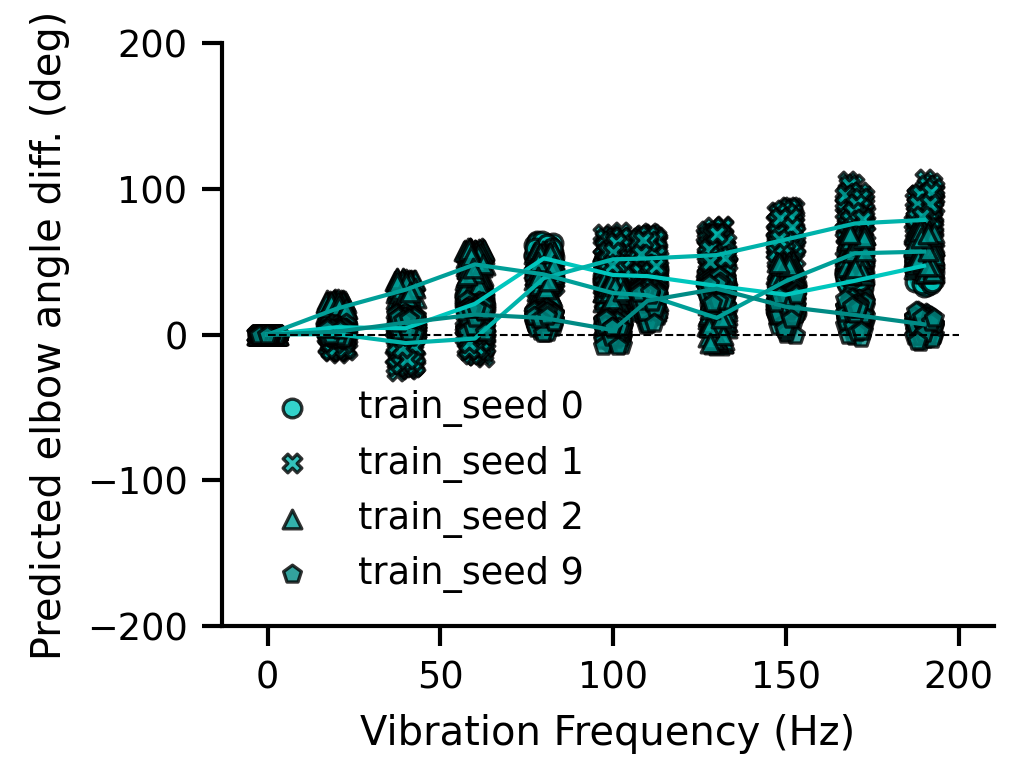

saved as  mean_vib_angle_diff_vsfreq_seed-0_BIClong_BICshort_per_train_seed.svg


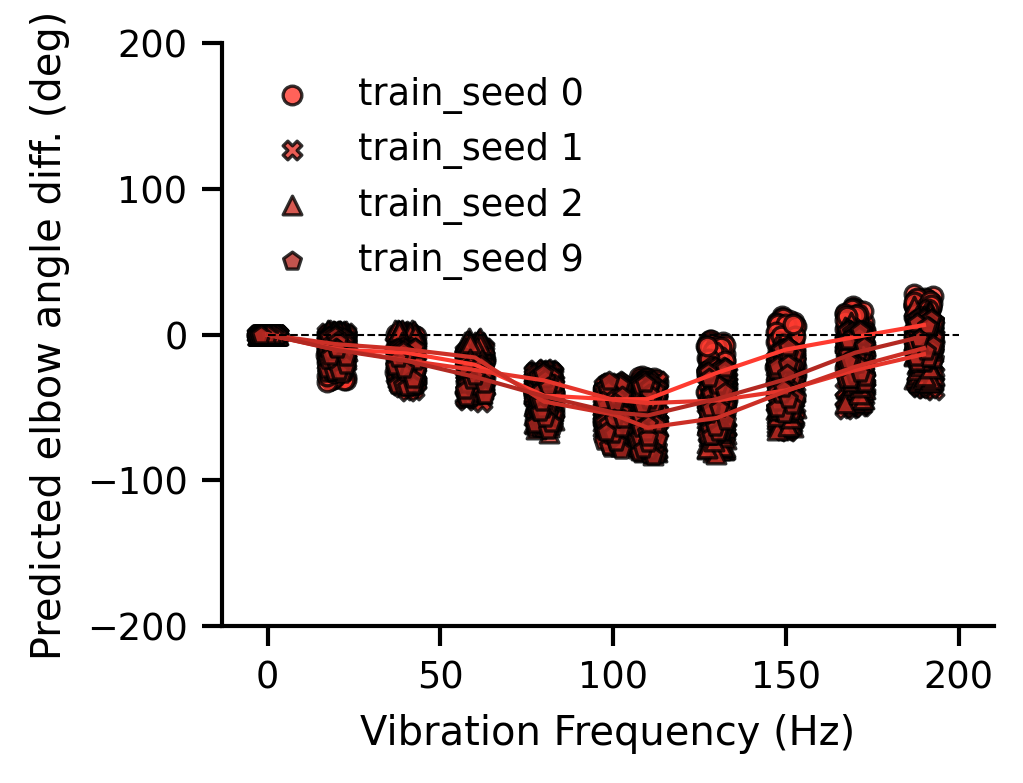

saved as  mean_vib_angle_diff_vsfreq_seed-1_BIClong_BICshort_per_train_seed.svg


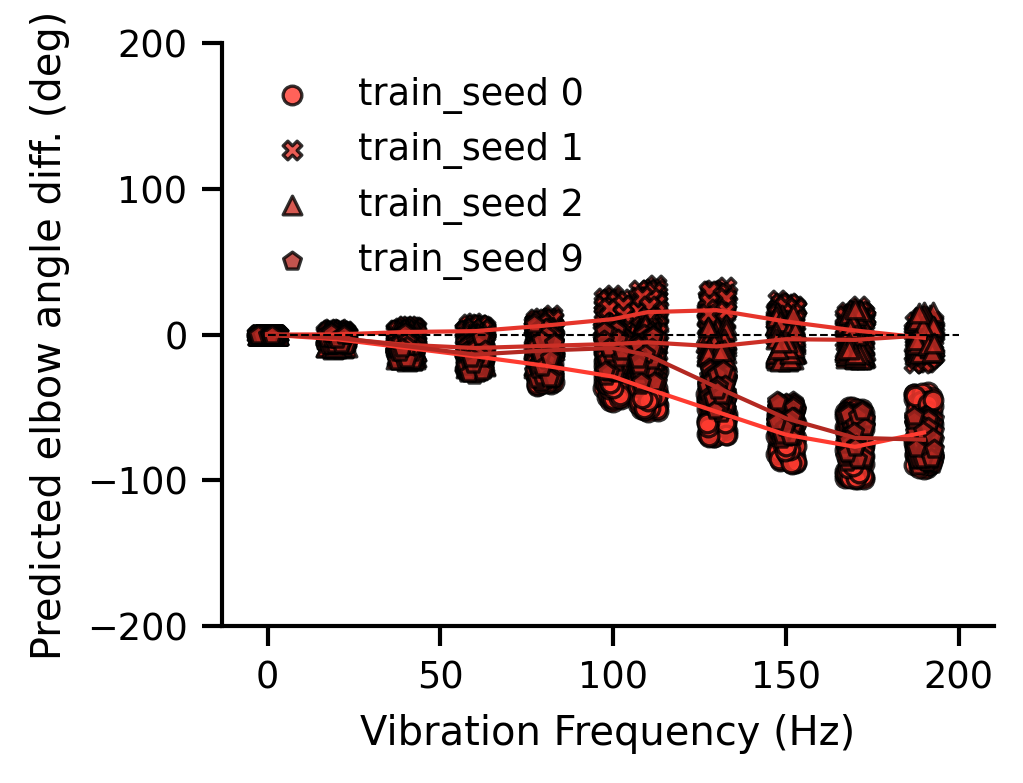

saved as  mean_vib_angle_diff_vsfreq_seed-2_BIClong_BICshort_per_train_seed.svg


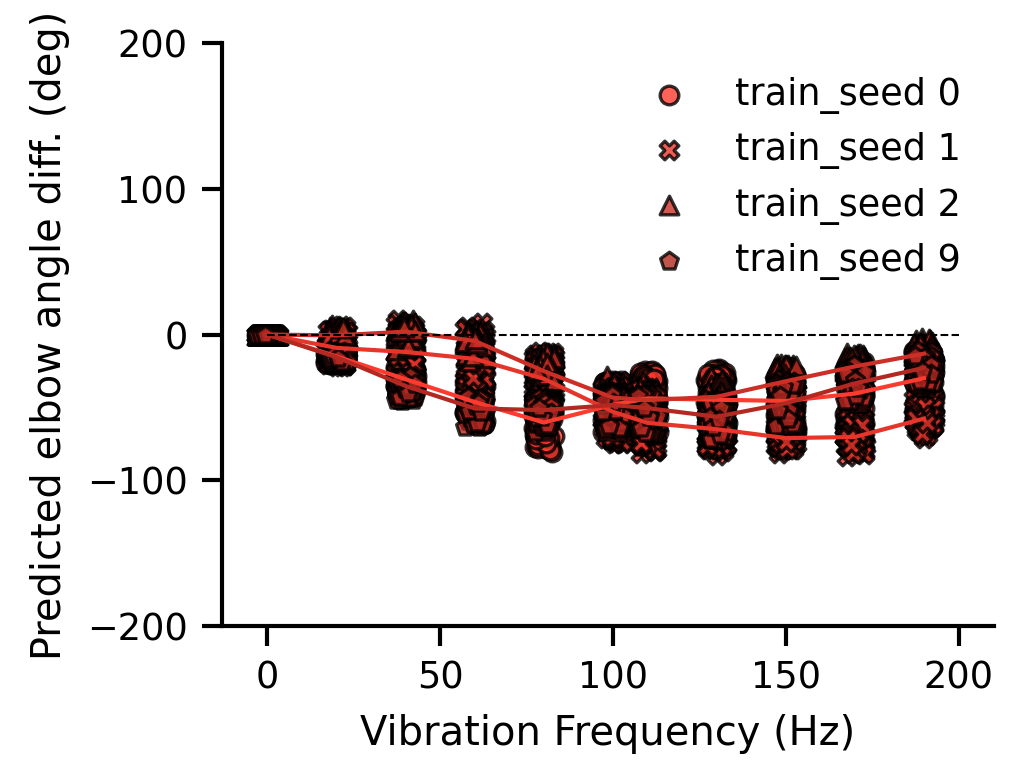

saved as  mean_vib_angle_diff_vsfreq_seed-3_BIClong_BICshort_per_train_seed.svg


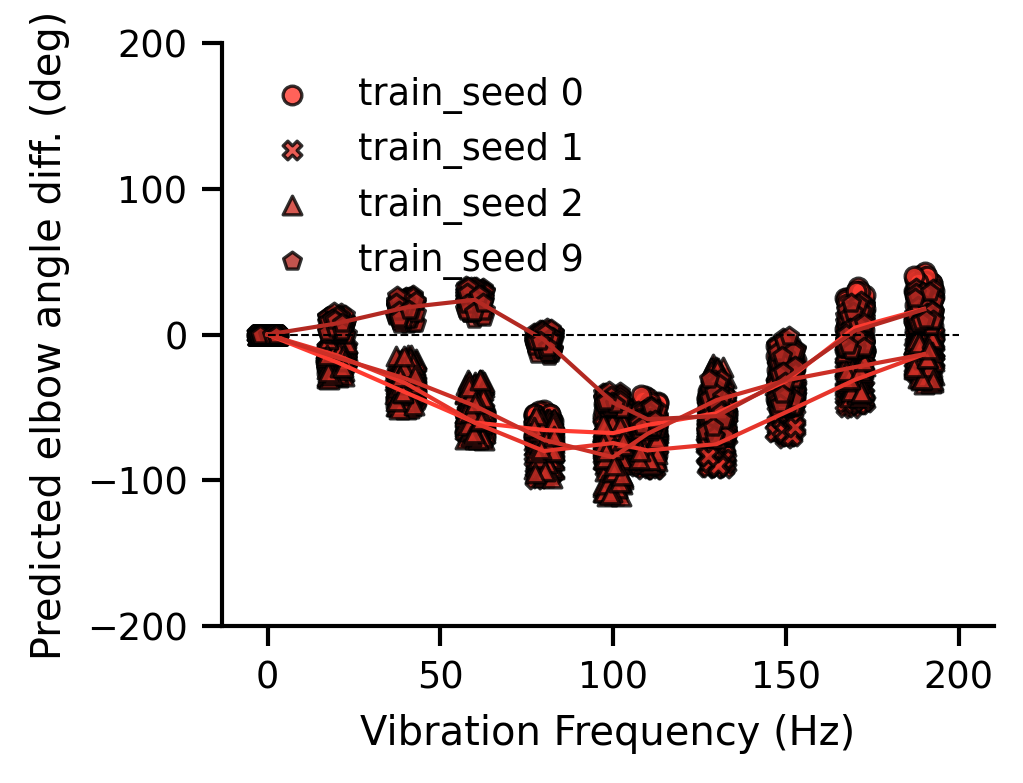

saved as  mean_vib_angle_diff_vsfreq_seed-4_BIClong_BICshort_per_train_seed.svg


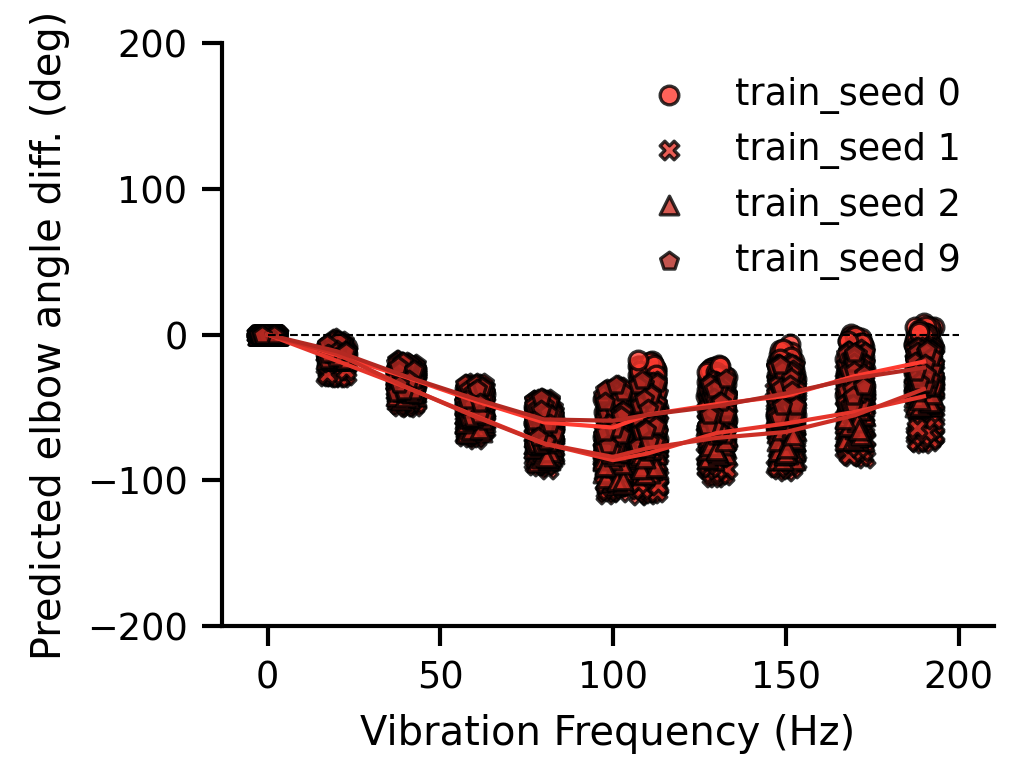

In [19]:
ylim = 200
# vib_muscles_str = 'TRI'
vib_m_str_to_plot = df_all["vib_muscles_str"].unique()
# vib_m_str_to_plot = ['TRI', 'BIC']
# vib_m_str_to_plot = vib_muscles
for vib_muscles_str in vib_m_str_to_plot:
    df_f = df_all[df_all["vib_muscles_str"] == vib_muscles_str]
    if "TRI" in vib_muscles_str:
        color = original_hex_tri
    elif "BIC" in vib_muscles_str:
        color = original_hex_biceps
    elif "ANC" in vib_muscles_str:
        color = original_hex_tri
    elif "BRA" in vib_muscles_str:
        color = original_hex_biceps
    else:
        color = "gray"
    
    for seed in unique_seeds:
        df_f_seed = df_f[df_f["coef_seed"] == seed]
        plot_angleOffset_vs_vibration(df_f_seed, path_save, color, "seed-" + seed + "_"+ vib_muscles_str,"vib_angle_diff_elbow", "train_seed", ylim=ylim, seed_marker_map=train_seed_marker_map)

## Fig 4 B

saved as  mean_vib_angle_diff_vsfreq_TRIlat_TRIlong_TRImed_all_per_None.svg


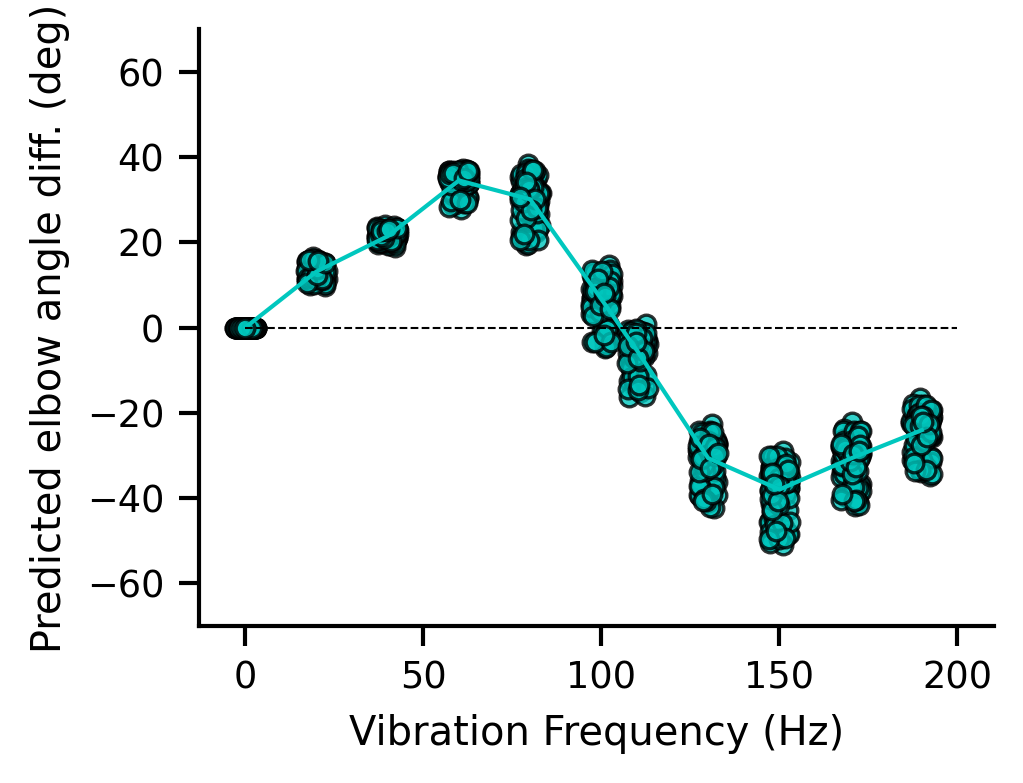

saved as  mean_vib_angle_diff_vsfreq_BIClong_BICshort_all_per_None.svg


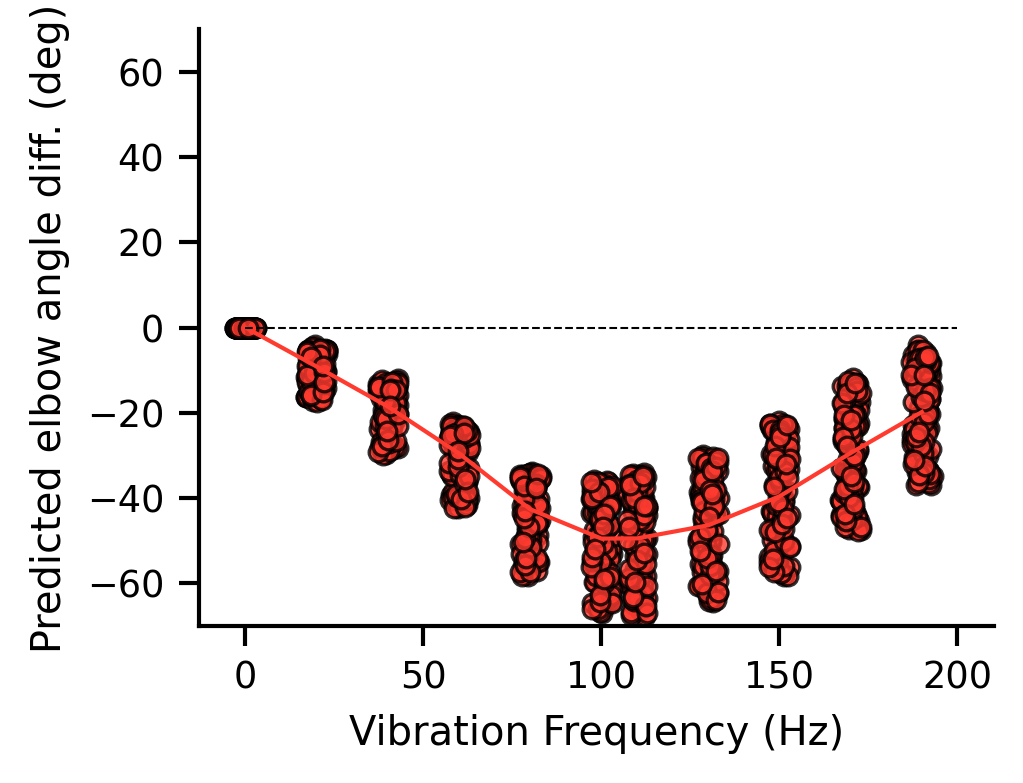

In [ ]:
ylim = 70
# vib_muscles_str = 'TRI'
vib_m_str_to_plot = df_all["vib_muscles_str"].unique()
# vib_m_str_to_plot = ['TRI', 'BIC']
# vib_m_str_to_plot = vib_muscles
for vib_muscles_str in vib_m_str_to_plot:
    df_f = df_all[df_all["vib_muscles_str"] == vib_muscles_str]
    if "TRI" in vib_muscles_str:
        color = original_hex_tri
    elif "BIC" in vib_muscles_str:
        color = original_hex_biceps
    elif "ANC" in vib_muscles_str:
        color = original_hex_tri
    elif "BRA" in vib_muscles_str:
        color = original_hex_biceps
    else:
        color = "gray"
    plot_angleOffset_vs_vibration(df_f, path_save, color, vib_muscles_str+"_all","vib_angle_diff_elbow", None, ylim=ylim)